# Import software libraries and load the dataset #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, LeakyReLU, Activation
from sklearn.model_selection import train_test_split

# Load the fashion mnist dataset

- Dataset provided from keras.
- Print the number of training images and testing images.
- Print the number of labels (unique).

In [2]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Number of training images:", train_images.shape[0])
print("Number of testing images:", test_images.shape[0])

unique_labels = np.unique(train_labels)
num_labels = len(unique_labels)
print("Number of unique labels:", num_labels)

Number of training images: 60000
Number of testing images: 10000
Number of unique labels: 10


# What is the shape of each image?

In [3]:
image_shape = train_images.shape[1:]
image_shape

(28, 28)

# The labels are encoded, find the name of each encoded label.

In [4]:
""" 
Label 0: T-shirt/top
Label 1: Trouser
Label 2: Pullover
Label 3: Dress
Label 4: Coat
Label 5: Sandal
Label 6: Shirt
Label 7: Sneaker
Label 8: Bag
Label 9: Ankle boot 
"""

' \nLabel 0: T-shirt/top\nLabel 1: Trouser\nLabel 2: Pullover\nLabel 3: Dress\nLabel 4: Coat\nLabel 5: Sandal\nLabel 6: Shirt\nLabel 7: Sneaker\nLabel 8: Bag\nLabel 9: Ankle boot \n'

# Plot 25 samples from the dataset

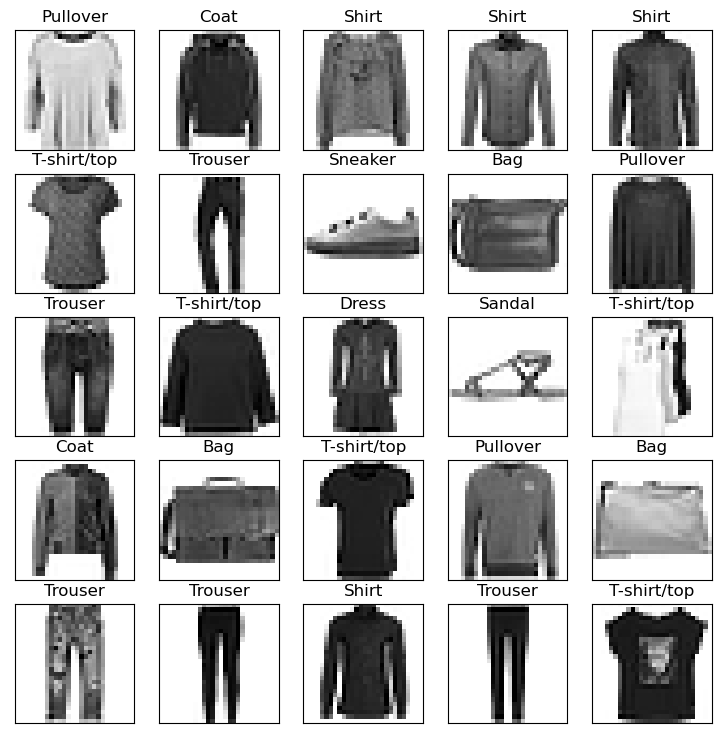

In [5]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

plt.figure(figsize=(9, 9))

for i in range(25):
    index = np.random.randint(0, train_images.shape[0])
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[index]])

plt.show()

# Prepare the data for training with Keras

- Hint : Use reshape method.
- Do not forget the one hot encoding process (use the method provided from keras).

In [6]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=34
)
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Validation images shape:", validation_images.shape)
print("Validation labels shape:", validation_labels.shape)

Training images shape: (54000, 28, 28, 1)
Training labels shape: (54000, 10)
Validation images shape: (6000, 28, 28, 1)
Validation labels shape: (6000, 10)


# Build the CNN structure

- The model contains the following layers :-

    1 - First Conv Layer :-
    
    2 - Activation Layer
    
    3 - Pooling Layer
    
    4 - Second Conv Layer
    
    5 - Activation Layer
    
    6 - Pooling Layer
    
    7 - Third Conv Layer
    
    8 - Activation Layer
    
    9 - Pooling Layer
    
    10 - Flatten Layer
    
    11 - Dense Layer
    
    In the Conv layers we have these parameters :-
    
        a. filters : What is the number of filters of the Conv layer, make it 32 (try to change it if you want).
        b. kernel_size : The filter size of the Conv layer, make it 3 by 3 (again try to change it).
        c. input_shape : The image shape.
        d. padding : make it same.
        e. activation : make it linear (also try to change it).
    
    In the hidden layers, we have three activation layers. Search for the best activation function used in our problem, give
    your reasons why did you use it, then use it.
    
    In the Activation layers we have this parameter :-
    
        a. alpha : make it 0.1 (try to change it).
        
    In the Pooling layers we have these parameters :-
    
        a. pool_size : the pooling window size, make it 2 by 2 (try to change it).
        b. padding : make it same.
        
    In the Flatten layer, make it default, because it is basically convert the tensors into vectors.
    
    In the Dense layer we have these parameters :-
    
        a. units : the number of output labels.
        b. activation : the function that will deal with the outputs and find the probability for each one.
            Note : There are several activation functions as an output function, select the sutable for our problem.

In [8]:
def CNN_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',  input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(10, activation='softmax'))


    return model

# Compile the model and examine the layers

- Find the best optimizer.
- What is the best loss function in this problem? (multi class).
- Do not forget the metric!! What is the best metric??

In [9]:
model = CNN_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Give me a summary of the NN

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         7

# Plot the structure of the NN and save it as a png image.

- Hint : Use plot_model function from keras.utils

In [11]:
from tensorflow.keras.utils import plot_model

In [18]:
conda install pydot

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\anaconda3

  added / updated specs:
    - pydot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |   py39haa95532_0         421 KB
    cairo-1.16.0               |       he04af86_2         1.5 MB
    conda-23.3.1               |   py39haa95532_0         972 KB
    expat-2.5.0                |       hd77b12b_0         225 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           | 

In [19]:
conda install pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |             py_3          23 KB
    ------------------------------------------------------------
                                           Total:          23 KB

The following NEW packages will be INSTALLED:

  pydotplus          pkgs/main/noarch::pydotplus-2.0.2-py_3 




pydotplus-2.0.2      | 23 KB     |            |   0% 
pydotplus-2.0.2      | 23 KB     | ######8    |  68% 
pydotplus-2.0.2      | 23 KB     | ########## | 100% 
                                                     


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use upda



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.3




In [20]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.3




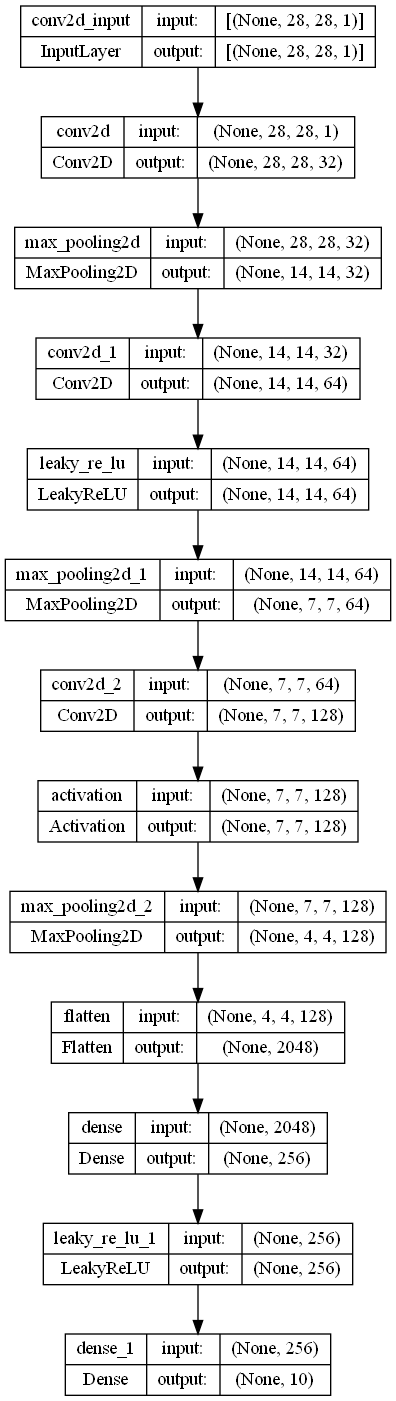

In [21]:
 plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

In [16]:
import tensorflow as tf

tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [17]:
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

# Display the plot (optional)
plt.imshow(plt.imread('model_structure.png'))
plt.axis('off')  
plt.show()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


FileNotFoundError: [Errno 2] No such file or directory: 'model_structure.png'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Train the model

- The x parameter should receive the training images.
- The y parameter should receive the training labels.
- The validation_data parameter should receive the validation data (the data we use with train_test_split).
- The epochs parameter should receive the number of epochs in the model, you can make it 1 it is ok.
    Note : You can increase the epochs, this will decrease the loss, but the loss will stop decreasing in sometimes.
- Make the verbose parameter 1.

In [ ]:
history = model.fit(
    x=train_images,  
    y=train_labels, 
    validation_data=(validation_images, validation_labels),  
    epochs=10,  
    verbose=1  
)

# Evaluate the model on the test data

- Use evaluate function to find the performance of the model.
- The x parameter should receive the testing images (the testing images we get from the dataset).
- The y parameter should receive the testing labels.
- You need to print the metric you choose before and the loss values.

In [ ]:
loss, metric_value = model.evaluate(
    x=test_images, 
    y=test_labels,  
    verbose=0  
)

print("Test Loss:", loss)
print("Test Metric (e.g., Accuracy):", metric_value)


# Make predictions on the test data

- Just print the first ten predictions and compare them with the actual values.

In [ ]:
predictions = model.predict(test_images)
correct_count = 0
false_count = 0

for i in range(10):
    predicted_class = np.argmax(predictions[i])  
    actual_class = np.argmax(test_labels[i]) 

    if predicted_class == actual_class:
        print("Example", i, "is Correct")
        correct_count += 1
    else:
        print("Example", i, "is False")
        false_count += 1

print()
print("Total Correct:", correct_count)
print("Total False:", false_count)

# Visualize the predictions for several examples (25 is enough).

- For each image, print the image with the actual value and predicted value.

In [ ]:
num_examples_to_visualize = 25

plt.figure(figsize=(10, 10))

for i in range(num_examples_to_visualize):
    plt.subplot(5, 5, i + 1) 
    plt.imshow(test_images[i], cmap=plt.cm.binary)  
    predicted_class = np.argmax(predictions[i]) 
    actual_class = np.argmax(test_labels[i])  
    plt.title(f'Predicted: {predicted_class}\nActual: {actual_class}', fontsize=8)  

plt.tight_layout()
plt.show()


# Save the model as pickle file

In [ ]:
import pickle

# Save the model to a file using pickle
with open('my_model.pickle', 'wb') as file:
    pickle.dump(model, file)